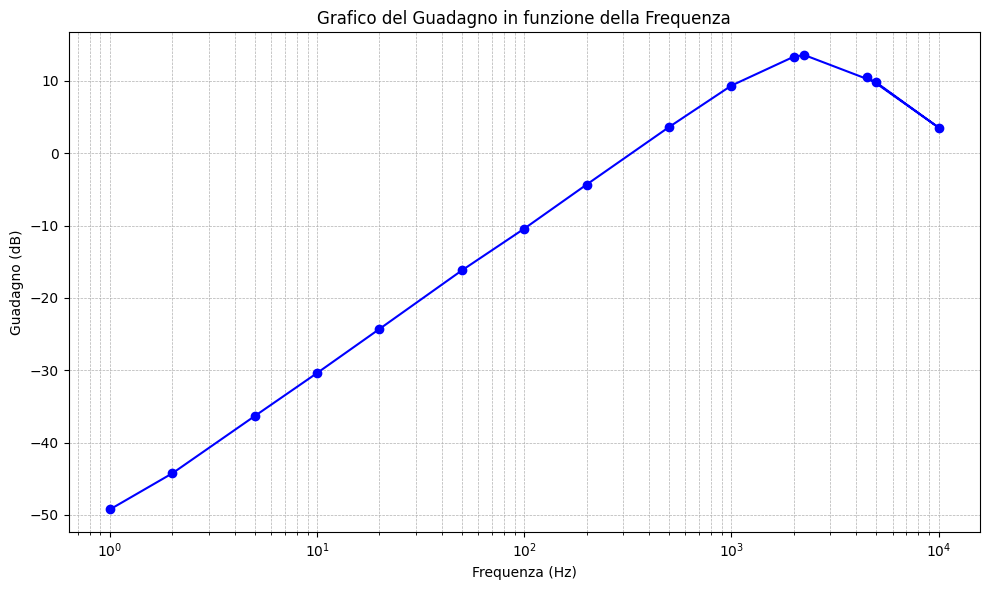

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Dati forniti
frequenze = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 2250, 5000, 10000, 4500]
vout = [3.450e-3, 6.126e-3, 15.250e-3, 30.250e-3, 61e-3, 155e-3, 301.250e-3, 607.5e-3, 
        1.518, 2.937, 4.65, 4.775, 3.087, 1.506, 3.387]

# Guadagno in dB
guadagno_db = 20 * np.log10(vout)

# Creazione del grafico
plt.figure(figsize=(10, 6))
plt.semilogx(frequenze, guadagno_db, marker='o', linestyle='-', color='b')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.title('Grafico del Guadagno in funzione della Frequenza')
plt.xlabel('Frequenza (Hz)')
plt.ylabel('Guadagno (dB)')
plt.tight_layout()

# Mostrare il grafico
plt.show()


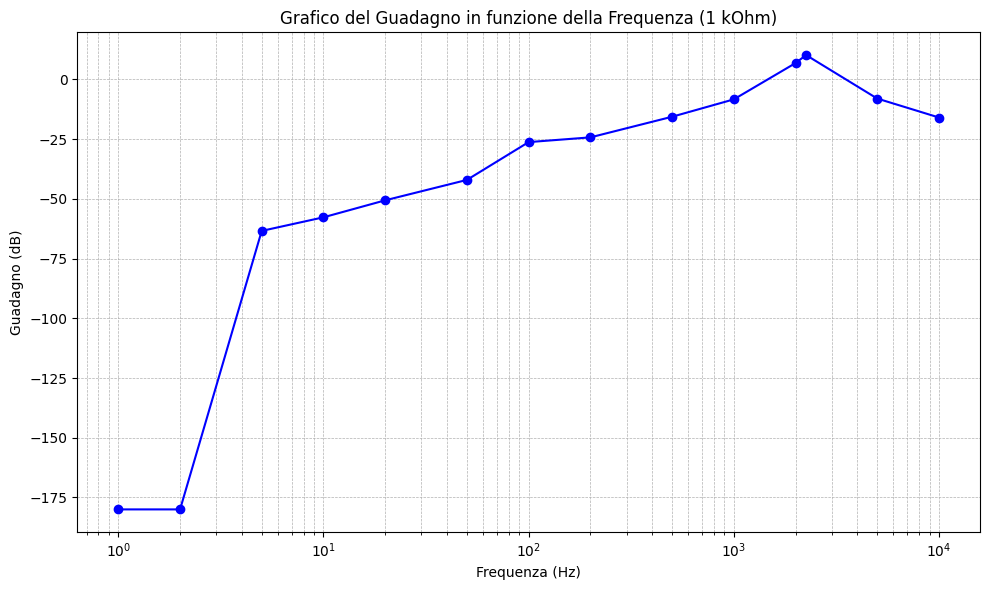

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Dati forniti
frequenze = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 2250, 5000, 10000]
vout = [0, 0, 675e-6, 1.3e-3, 2.950e-3, 7.875e-3, 48.75e-3, 61.250e-3, 
        165.375e-3, 382.2e-3, 2.199, 3.236, 397.7e-3, 159.5e-3]

# Guadagno in dB (evitare logaritmo di zero)
vout = np.array(vout)
vout[vout == 0] = 1e-9  # Sostituire 0 con un valore molto piccolo
guadagno_db = 20 * np.log10(vout)

# Creazione del grafico
plt.figure(figsize=(10, 6))
plt.semilogx(frequenze, guadagno_db, marker='o', linestyle='-', color='b')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.title('Grafico del Guadagno in funzione della Frequenza (1 kOhm)')
plt.xlabel('Frequenza (Hz)')
plt.ylabel('Guadagno (dB)')
plt.tight_layout()

# Mostrare il grafico
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

def plot_rotating_cube():
    """Crea un cubo 3D rotante."""
    # Definizione dei vertici del cubo
    vertices = np.array([[-1, -1, -1],
                         [ 1, -1, -1],
                         [ 1,  1, -1],
                         [-1,  1, -1],
                         [-1, -1,  1],
                         [ 1, -1,  1],
                         [ 1,  1,  1],
                         [-1,  1,  1]])

    # Definizione delle connessioni tra i vertici
    edges = [(0, 1), (1, 2), (2, 3), (3, 0),  # Base inferiore
             (4, 5), (5, 6), (6, 7), (7, 4),  # Base superiore
             (0, 4), (1, 5), (2, 6), (3, 7)]  # Connessioni verticali

    # Funzione per aggiornare la rotazione
    def update(num, lines, ax):
        ax.view_init(elev=10, azim=num)
        return lines

    # Cr

/home/oudeys/.local/lib/python3.12/site-packages/matplotlib/animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


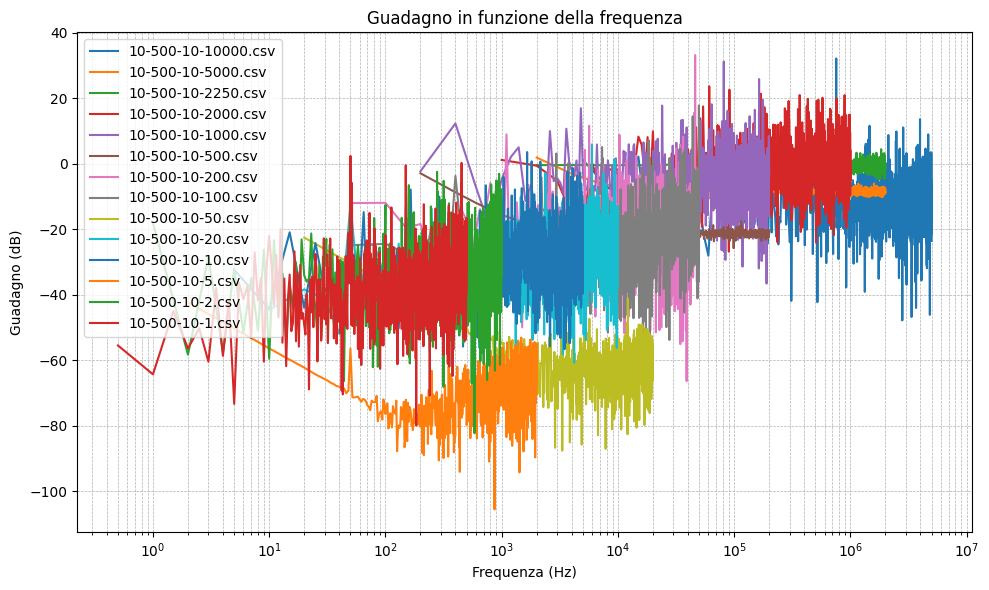

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def process_csv(file_path):
    """Legge un file CSV e restituisce frequenze e guadagno."""
    # Caricamento e pulizia del file
    data = pd.read_csv(file_path).iloc[1:].copy()
    data.columns = ['time', 'voltage_input', 'voltage_output']
    data['time'] = pd.to_numeric(data['time'], errors='coerce')
    data['voltage_input'] = pd.to_numeric(data['voltage_input'], errors='coerce')
    data['voltage_output'] = pd.to_numeric(data['voltage_output'], errors='coerce')

    time = data['time'].values
    voltage_input = data['voltage_input'].values
    voltage_output = data['voltage_output'].values

    # Calcolo della frequenza di campionamento
    sampling_rate = 1 / np.abs(np.mean(np.diff(time)))

    # Applicazione della FFT
    fft_input = np.fft.fft(voltage_input)
    fft_output = np.fft.fft(voltage_output)
    freqs = np.fft.fftfreq(len(time), d=1 / sampling_rate)

    # Filtraggio delle frequenze positive
    positive_freqs = freqs[freqs > 0]
    gain = 20 * np.log10(np.abs(fft_output[freqs > 0]) / np.abs(fft_input[freqs > 0]))

    return positive_freqs, gain

def plot_gain_from_folder(folder_path):
    """Legge tutti i file CSV in una cartella e plotta il guadagno in funzione della frequenza."""
    # Ottenere tutti i file CSV nella cartella
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    # Inizializzazione del plot
    plt.figure(figsize=(10, 6))

    for file in csv_files:
        file_path = os.path.join(folder_path, file)
        freqs, gain = process_csv(file_path)
        plt.semilogx(freqs, gain, label=file)

    plt.title('Guadagno in funzione della frequenza')
    plt.xlabel('Frequenza (Hz)')
    plt.ylabel('Guadagno (dB)')
    plt.grid(which='both', linestyle='--', linewidth=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Specificare il percorso della cartella contenente i file CSV
folder_path = 'assets/10'
plot_gain_from_folder(folder_path)